<a href="https://colab.research.google.com/github/MaazMahboob/GNCIPL-AI-ML-/blob/main/AIML_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML Week-5 Project

# Project Name: LOAN APPROVAL PREDICTOR


### Project Type:  Neural Networks & Deep Learning

### Dataset Link : (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data)

### Project prepared by : Maaz Mahboob




## **Problem Statement**: The goal of this project is to build a Deep-learning model that predicts whether a loan application should be approved or rejected based on a customer’s financial, personal, and credit information. By preprocessing the data and training different neural network models, the aim is to identify the most accurate model that can help lenders make faster, consistent, and data-driven loan decisions.

#Coding Section

# Part 1: Setup & Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Preprocessing & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE

# Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)



# Model Export
import joblib


### STEP 1: DATASET LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_data.csv')

print("\n" + "="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)


DATASET LOADED SUCCESSFULLY


### STEP 2:  DATASET DIMENSIONS

In [ ]:
print("\n STEP 2: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 2: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 45000
Number of columns: 14


###STEP 3: DATASET FIRST LOOK

In [ ]:
print("\nSTEP 3: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 7 Rows of the Dataset:\n")
df.head(10)


STEP 3: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 7 Rows of the Dataset:



person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   
5        21.0        female      High School        12951.0               0   
6        26.0        female         Bachelor        93471.0               1   
7        24.0        female      High School        95550.0               5   
8        24.0        female        Associate       100684.0               3   
9        21.0        female      High School        12739.0               0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   
5                   OWN     2500.0     VENTURE           7.14   
6                  RENT    35000.0   EDUCATION          12.42   
7                  RENT    35000.0     MEDICAL          11.11   
8                  RENT    35000.0    PERSONAL           8.90   
9                   OWN     1600.0     VENTURE          14.74   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   
5                 0.19                         2.0           532   
6                 0.37                         3.0           701   
7                 0.37                         4.0           585   
8                 0.35                         2.0           544   
9                 0.13                         3.0           640   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1  
5                             No            1  
6                             No            1  
7                             No            1  
8                             No            1  
9                             No            1

### STEP 4: DATASET INFORMATION

In [ ]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length  

### STEP 5: DATASET DESCRIPTION

In [ ]:
print("\n STEP 5: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df.describe()


 STEP 5: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [ ]:
print("\n" + "-"*80)
print("TARGET VARIABLE DISTRIBUTION")
print("-"*80)
print(df['loan_status'].value_counts())
print(f"Rejection Rate: {(1-df['loan_status'].mean())*100:.2f}%")
print(f"Approval Rate: {df['loan_status'].mean()*100:.2f}%")



--------------------------------------------------------------------------------
TARGET VARIABLE DISTRIBUTION
--------------------------------------------------------------------------------
loan_status
0    35000
1    10000
Name: count, dtype: int64
Rejection Rate: 77.78%
Approval Rate: 22.22%


### STEP 8: VARIABLES DESCRIPTION

In [ ]:
print("\n STEP 8: VARIABLES DESCRIPTION")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

APPLICANT PERSONAL INFORMATION:
-------------------------------
1. person_age
   • Age of the applicant.
   • Helps assess financial maturity and repayment stability.

2. person_gender
   • Gender of the applicant.
   • Categorical variable (e.g., male / female).

3. person_education
   • Highest education level achieved.
   • Often correlated with income, job stability, and financial awareness.

FINANCIAL BACKGROUND:
---------------------
4. person_income
   • Annual income of the applicant.
   • Critical for evaluating repayment capacity.

5. person_emp_exp
   • Total years of employment experience.
   • Indicates job stability and work history.

6. person_home_ownership
   • Type of housing (rent, own, mortgage).
   • Acts as an indicator of financial responsibility.

LOAN DETAILS:
-------------
7. loan_amnt
   • Total loan amount requested.
   • Primary factor for risk assessment.

8. loan_intent
   • Stated purpose of the loan (e.g., education, medical, debt consolidation).
   • Helps understand spending motivation and risk category.

9. loan_int_rate
   • Interest rate offered for the loan.
   • Higher rates often indicate higher perceived risk.

10. loan_percent_income
    • Loan amount as a percentage of annual income.
    • Higher values suggest heavier financial burden and higher risk.

CREDIT HISTORY:
---------------
11. cb_person_cred_hist_length
    • Length of credit history in years.
    • Longer histories generally indicate more reliable credit behavior.

12. credit_score
    • Standard credit score of the applicant.
    • One of the strongest predictors of repayment ability.

13. previous_loan_defaults_on_file
    • Indicates whether the applicant has defaulted before (Yes/No).
    • Strong negative factor for loan approval.

TARGET VARIABLE:
----------------
14. loan_status
    • Approval outcome of the loan.
    • Binary variable: 1 = Approved, 0 = Rejected.
""")



 STEP 8: VARIABLES DESCRIPTION
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

APPLICANT PERSONAL INFORMATION:
-------------------------------
1. person_age
   • Age of the applicant.
   • Helps assess financial maturity and repayment stability.

2. person_gender
   • Gender of the applicant.
   • Categorical variable (e.g., male / female).

3. person_education
   • Highest education level achieved.
   • Often correlated with income, job stability, and financial awareness.

FINANCIAL BACKGROUND:
---------------------
4. person_income
   • Annual income of the applicant.
   • Critical for evaluating repayment capacity.

5. person_emp_exp
   • Total years of employment experience.
   • Indicates job stability and work history.

6. person_home_ownership
   • Type of housing (rent, own, mortgage).
   • Acts as an indicator of financial responsibility.

LOAN DETAILS:
-------------
7. loan_amnt
   • Total loan amount requested.
   • 

#  Part 2: Data Exploration & EDA



###STEP 7: MISSING VALUES COUNT

In [ ]:
print("\n STEP 7: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 7: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Total missing values: 0


### VISUALIZING MISSING VALUES

In [ ]:
print("\n VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


✓ No missing values found in the dataset! ✅


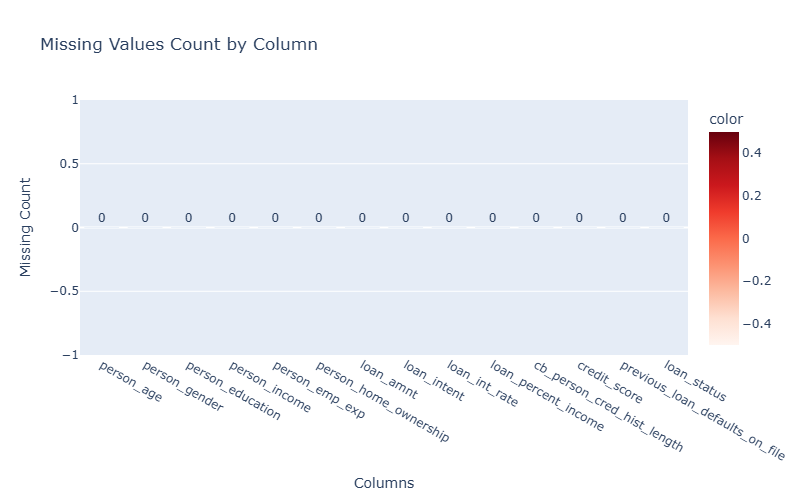

### STEP 8: Check & Handle Duplicate Rows

In [ ]:
print("\n" + "-"*80)
print("DUPLICATE RECORDS CHECK")
print("-"*80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✓ No duplicate records found!")
else:
    print(f"⚠ Found {duplicates} duplicate rows. Removing them...")
    df = df.drop_duplicates()
    print("✓ Duplicate rows removed successfully.")



--------------------------------------------------------------------------------
DUPLICATE RECORDS CHECK
--------------------------------------------------------------------------------
Number of duplicate rows: 0
✓ No duplicate records found!


### Step 9 : Understanding Categorical and Numerical columns


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n" + "-"*80)
print("FEATURE CATEGORIZATION")
print("-"*80)
print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")

# Unique values in categorical columns
print("\n" + "-"*80)
print("UNIQUE VALUES IN CATEGORICAL FEATURES")
print("-"*80)
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"  Values: {df[col].unique()}\n")


--------------------------------------------------------------------------------
FEATURE CATEGORIZATION
--------------------------------------------------------------------------------
Categorical Features (5): ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical Features (9): ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

--------------------------------------------------------------------------------
UNIQUE VALUES IN CATEGORICAL FEATURES
--------------------------------------------------------------------------------
person_gender: 2 unique values
  Values: ['female' 'male']

person_education: 5 unique values
  Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: 4 unique values
  Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: 6 unique values
  Values:

### VISUALIZATION 1: Target Variable Distribution

In [ ]:
counts = df['loan_status'].value_counts().reindex([0, 1], fill_value=0)
bar_labels = ['Rejected (0)', 'Approved (1)']
pie_labels = ['Rejected', 'Approved']
colors = ['#ef4444', '#10b981']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "domain"}]],
                    column_widths=[0.6, 0.4])

# Bar chart (left)
fig.add_trace(
    go.Bar(
        x=bar_labels,
        y=counts.values,
        marker=dict(color=colors, line=dict(color='black', width=1)),
        text=counts.values,
        textposition='outside'
    ),
    row=1, col=1
)

# Pie chart (right)
fig.add_trace(
    go.Pie(
        labels=pie_labels,
        values=counts.values,
        hole=0.0,
        marker=dict(colors=colors),
        pull=[0.05, 0.05],
        textinfo='percent+label'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Loan Status Distribution & Approval Rate',
    showlegend=False,
    margin=dict(t=60, l=20, r=20, b=20),
    height=450,
)

# left subplot axes titles
fig.update_xaxes(title_text='Loan Status', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

fig.show()

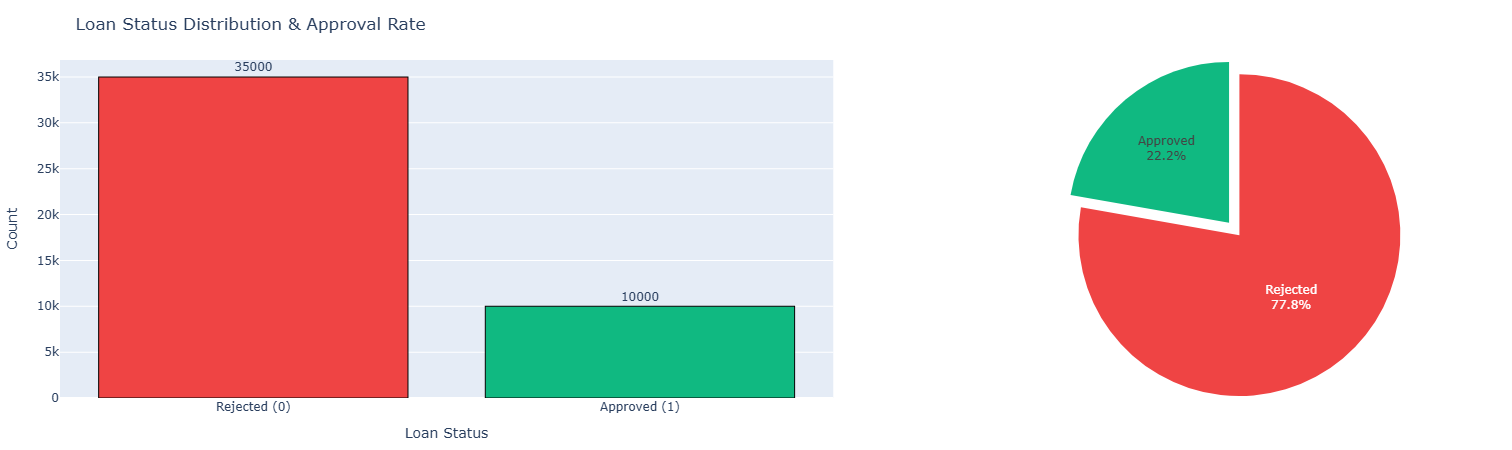

### VISUALIZATION 2: Age Distribution

In [ ]:
age_data = df['person_age']
mean_age = age_data.mean()
median_age = age_data.median()

# Create subplots: histogram (left) + boxplot (right)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Age Distribution", "Age Distribution by Loan Status"),
    column_widths=[0.6, 0.4]
)

# ------------------------------------
# 1. Histogram
# ------------------------------------
fig.add_trace(
    go.Histogram(
        x=age_data,
        nbinsx=30,
        marker=dict(color='#3b82f6', line=dict(color='black', width=1)),
        opacity=0.75,
        name='Age'
    ),
    row=1, col=1
)

# Add mean line
fig.add_trace(
    go.Scatter(
        x=[mean_age, mean_age],
        y=[0, max(df['person_age'].value_counts())],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name=f"Mean: {mean_age:.1f}"
    ),
    row=1, col=1
)

# Add median line
fig.add_trace(
    go.Scatter(
        x=[median_age, median_age],
        y=[0, max(df['person_age'].value_counts())],
        mode='lines',
        line=dict(color='green', dash='dot'),
        name=f"Median: {median_age:.1f}"
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)

# ------------------------------------
# 2. Box Plot by Loan Status
# ------------------------------------
fig.add_trace(
    go.Box(
        y=df.loc[df['loan_status'] == 0, 'person_age'],
        name='Rejected (0)',
        marker_color='#ef4444',
        boxmean=True
    ),
    row=1, col=2
)

fig.add_trace(
    go.Box(
        y=df.loc[df['loan_status'] == 1, 'person_age'],
        name='Approved (1)',
        marker_color='#10b981',
        boxmean=True
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Loan Status", row=1, col=2)
fig.update_yaxes(title_text="Age", row=1, col=2)

# Layout adjustments
fig.update_layout(
    height=500,
    width=1400,
    showlegend=True,  # show mean & median labels
    title_text="Age Distribution & Age vs Loan Status",
    margin=dict(t=70, l=30, r=30, b=20)
)

fig.show()


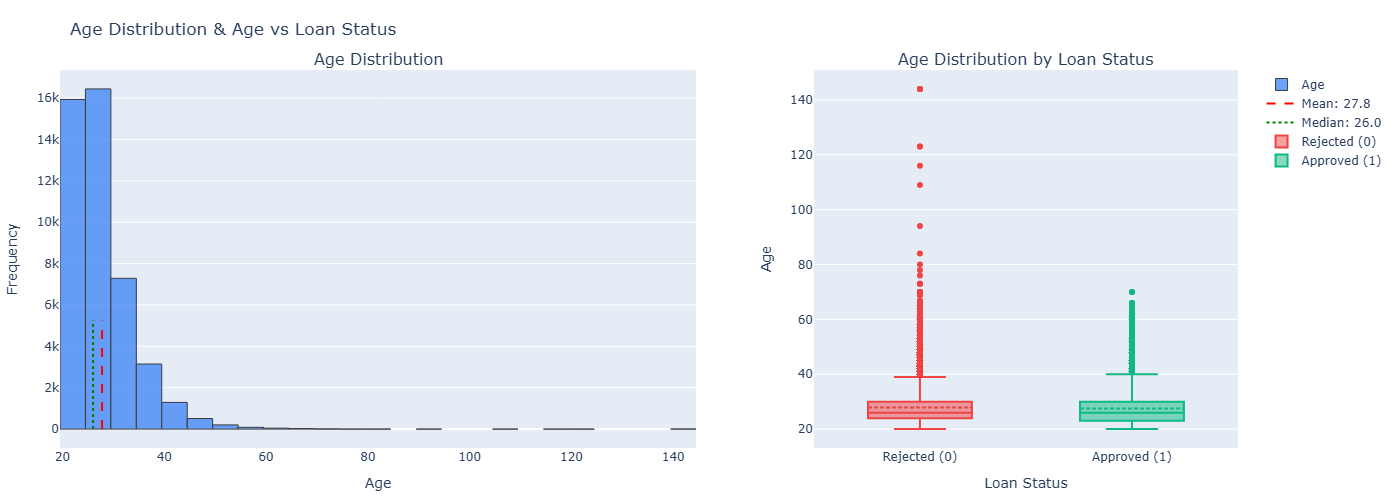

Insight :

Most applicants are young (20–35), with a few unrealistic age outliers that should be cleaned.

Approved and rejected groups show similar age patterns, so age alone doesn’t strongly influence loan approval.

### VISUALIZATION 3: Income Analysis

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Apply log transformation for visualization only
df['log_income'] = np.log1p(df['person_income'])

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Income Distribution (Log Scale)", "Income by Loan Status (Log Scale)"),
    column_widths=[0.6, 0.4]
)

# ---------------------------
# Histogram (log income)
# ---------------------------
fig.add_trace(
    go.Histogram(
        x=df['log_income'],
        nbinsx=50,
        marker=dict(color='#10b981', line=dict(color='black', width=1)),
        opacity=0.75,
        name='Log Income'
    ),
    row=1, col=1
)

# Mean line (log income)
mean_log_inc = df['log_income'].mean()
fig.add_trace(
    go.Scatter(
        x=[mean_log_inc, mean_log_inc],
        y=[0, df['log_income'].value_counts().max()],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name="Mean (log)"
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Log(Income)", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)

# ---------------------------
# Histogram by loan status (log income)
# ---------------------------
fig.add_trace(
    go.Histogram(
        x=df[df['loan_status'] == 0]['log_income'],
        nbinsx=40,
        marker=dict(color='#ef4444'),
        opacity=0.6,
        name="Rejected"
    ),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(
        x=df[df['loan_status'] == 1]['log_income'],
        nbinsx=40,
        marker=dict(color='#10b981'),
        opacity=0.6,
        name="Approved"
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Log(Income)", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)

fig.update_layout(
    barmode='overlay',
    height=500,
    width=1500,
    title_text="Income Analysis (Log Scale)",
    showlegend=True
)

fig.show()


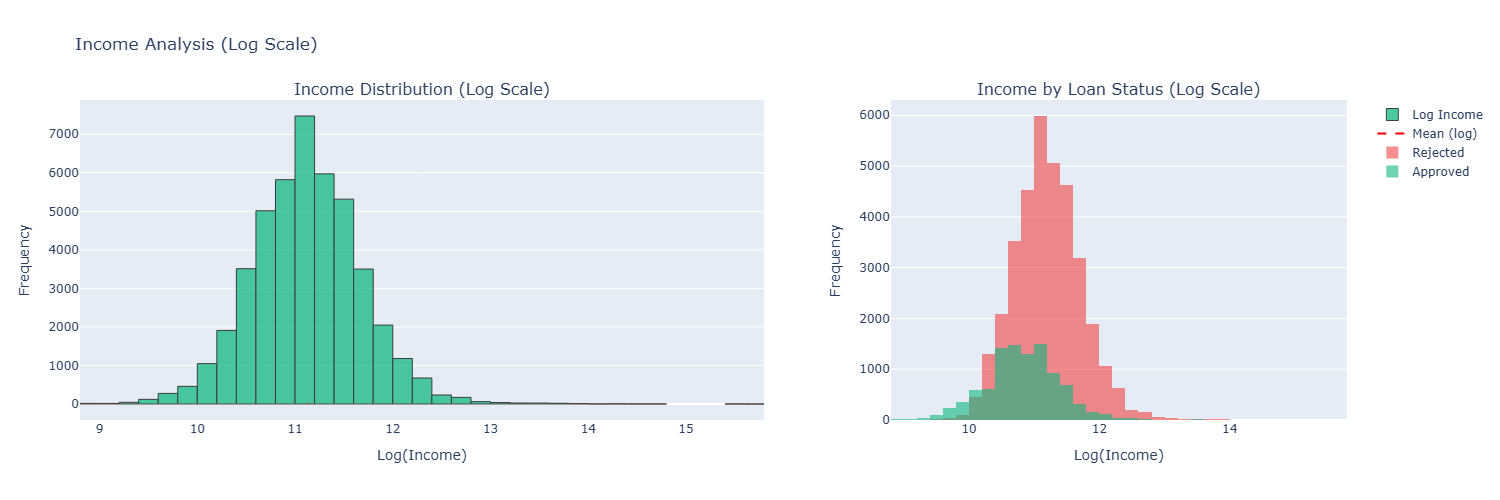

After applying log transformation, income shows a clear bell-shaped pattern, indicating a more realistic distribution once extreme outliers are normalized.

Approved and rejected applicants have almost identical income ranges on the log scale, suggesting that income alone does not significantly influence loan approval

### VISUALIZATION 4: Credit Score Analysis

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

credit_data = df['credit_score']
mean_credit = credit_data.mean()

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Credit Score Distribution", "Credit Score by Loan Status"),
    column_widths=[0.6, 0.4]
)

# ------------------------------------
# 1. Histogram (with mean line)
# ------------------------------------
fig.add_trace(
    go.Histogram(
        x=credit_data,
        nbinsx=40,
        marker=dict(color='#8b5cf6', line=dict(color='black', width=1)),
        opacity=0.75,
        name='Credit Score'
    ),
    row=1, col=1
)

# Add mean line
fig.add_trace(
    go.Scatter(
        x=[mean_credit, mean_credit],
        y=[0, credit_data.value_counts().max()],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name=f"Mean: {mean_credit:.0f}"
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Credit Score", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)

# ------------------------------------
# 2. Box Plot by Loan Status
# ------------------------------------
fig.add_trace(
    go.Box(
        y=df[df['loan_status'] == 0]['credit_score'],
        name='Rejected (0)',
        marker_color='#ef4444',
        boxmean=True
    ),
    row=1, col=2
)

fig.add_trace(
    go.Box(
        y=df[df['loan_status'] == 1]['credit_score'],
        name='Approved (1)',
        marker_color='#10b981',
        boxmean=True
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Loan Status", row=1, col=2)
fig.update_yaxes(title_text="Credit Score", row=1, col=2)

# Layout
fig.update_layout(
    height=500,
    width=1500,
    showlegend=True,
    title_text="Credit Score Distribution & Loan Status Comparison",
    margin=dict(t=70, l=30, r=30, b=20)
)

fig.show()


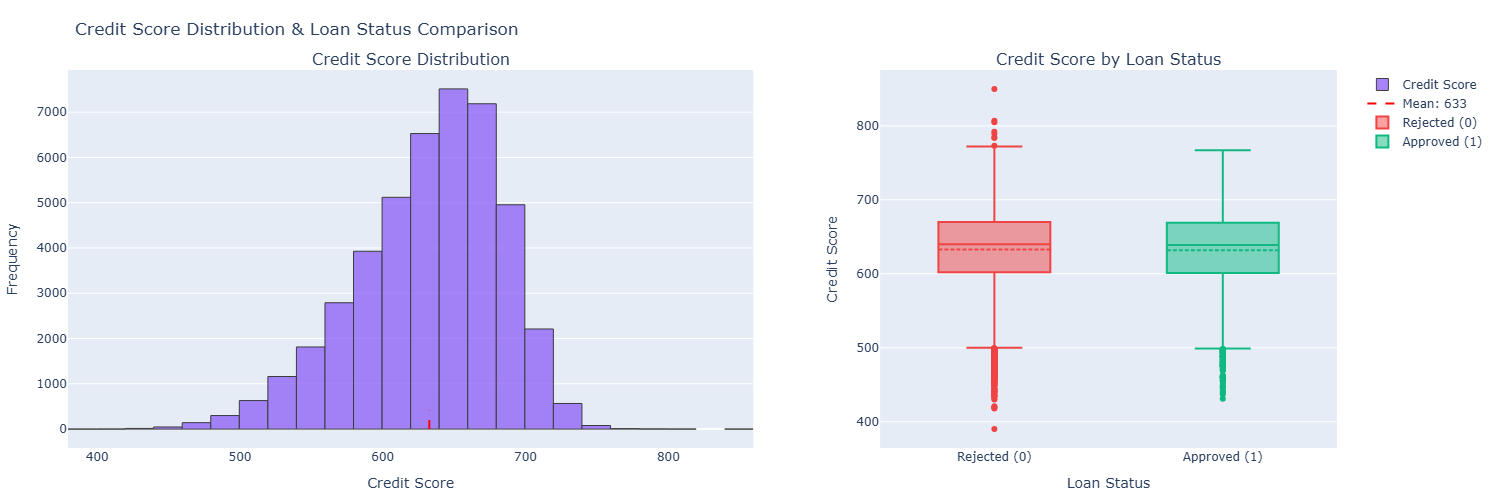

# Part 3: Advanced Exploratory Data Analysis

### VISUALIZATION 5: Categorical Features Analysis

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare gender data
gender_counts = df['person_gender'].value_counts()

# Prepare grouped data for loan status
gender_approval = df.groupby(['person_gender', 'loan_status']).size().unstack().fillna(0)
rejected_counts = gender_approval[0]
approved_counts = gender_approval[1]

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Gender Distribution", "Loan Approval by Gender"),
    column_widths=[0.5, 0.5]
)

# -----------------------
# 1. Gender Distribution
# -----------------------
fig.add_trace(
    go.Bar(
        x=gender_counts.index,
        y=gender_counts.values,
        marker=dict(color=['#3b82f6', '#ec4899']),
        opacity=0.85,
        name="Gender Count"
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

# -----------------------
# 2. Loan Approval by Gender (Grouped)
# -----------------------
fig.add_trace(
    go.Bar(
        x=gender_approval.index,
        y=rejected_counts,
        name="Rejected (0)",
        marker=dict(color='#ef4444'),
        opacity=0.8
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=gender_approval.index,
        y=approved_counts,
        name="Approved (1)",
        marker=dict(color='#10b981'),
        opacity=0.8
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

# Set barmode to group
fig.update_layout(
    barmode='group',
    height=500,
    width=1500,
    showlegend=True,
    title_text="Gender Analysis"
)

fig.show()


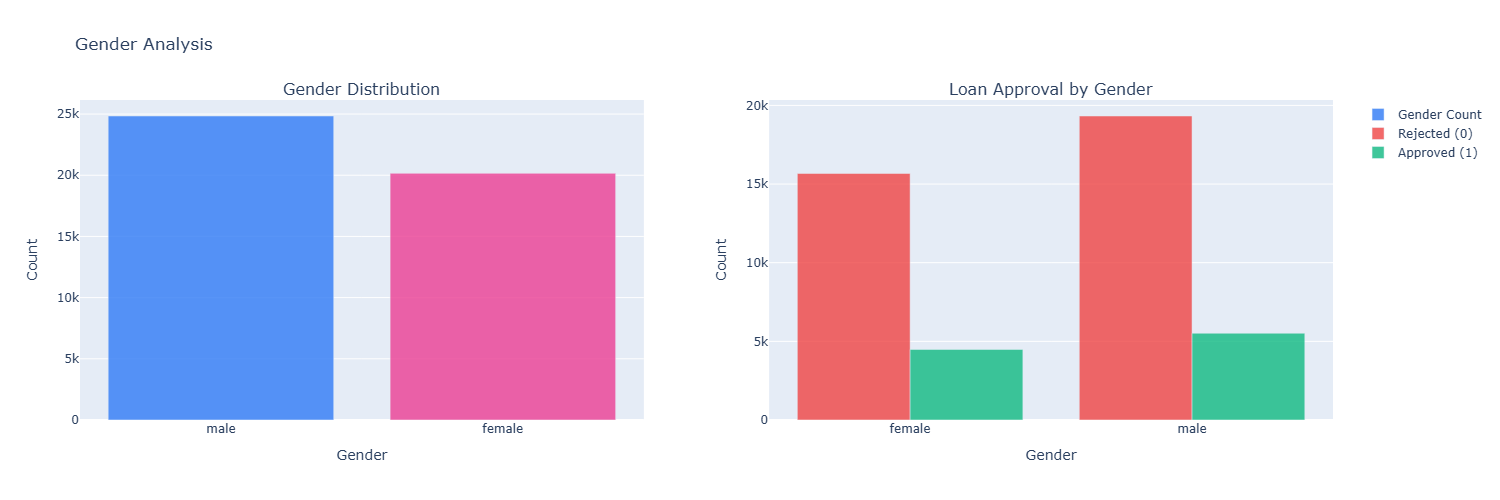

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data for education distribution
education_counts = df['person_education'].value_counts()

# Loan approval rate by education
education_approval = df.groupby(['person_education', 'loan_status']).size().unstack().fillna(0)
education_approval_rate = (education_approval[1] / education_approval.sum(axis=1)) * 100
education_approval_rate = education_approval_rate.sort_values()

# Create subplots
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Education Level Distribution", "Approval Rate by Education Level"),
    column_widths=[0.5, 0.5]
)

# -----------------------
# 1. Education Distribution (Horizontal Bar)
# -----------------------
fig.add_trace(
    go.Bar(
        y=education_counts.index,
        x=education_counts.values,
        orientation="h",
        marker=dict(color='#f59e0b', line=dict(color='black', width=1)),
        opacity=0.85,
        name="Education Count"
    ),
    row=1,
    col=1
)

fig.update_xaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Education Level", row=1, col=1)

# -----------------------
# 2. Approval Rate by Education (Horizontal Bar)
# -----------------------
fig.add_trace(
    go.Bar(
        y=education_approval_rate.index,
        x=education_approval_rate.values,
        orientation="h",
        marker=dict(color='#10b981', line=dict(color='black', width=1)),
        opacity=0.85,
        name="Approval Rate (%)"
    ),
    row=1,
    col=2
)

fig.update_xaxes(title_text="Approval Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Education Level", row=1, col=2)

# Layout
fig.update_layout(
    height=500,
    width=1500,
    title_text="Education Analysis",
    showlegend=False
)

fig.show()


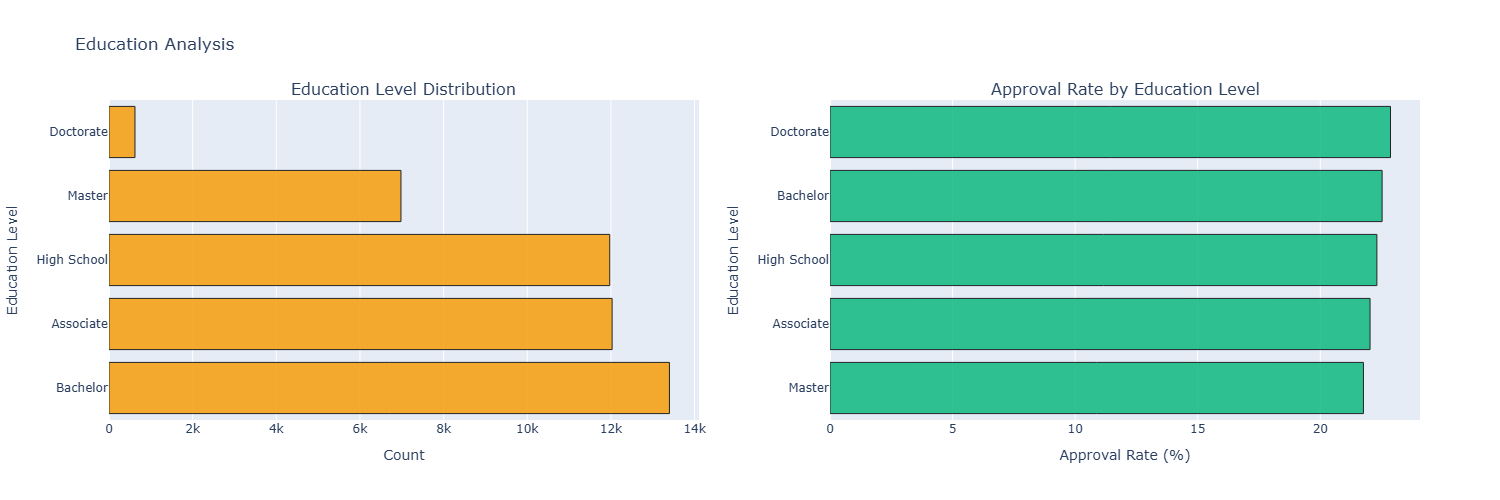

In [ ]:
# ===== PIE CHART =====
ownership_counts = df['person_home_ownership'].value_counts()

fig_pie = px.pie(
    values=ownership_counts.values,
    names=ownership_counts.index,
    title='Home Ownership Distribution',
    color_discrete_sequence=['#3b82f6', '#10b981', '#f59e0b', '#ef4444']
)

fig_pie.update_traces(
    textinfo='percent+label',
    pull=0.05
)

fig_pie.update_layout(
    title_font_size=16
)

fig_pie.show()


# ===== GROUPED BAR CHART =====
ownership_approval = df.groupby(
    ['person_home_ownership', 'loan_status']
).size().unstack().reset_index()

# Detect all loan_status columns automatically
status_cols = ownership_approval.columns[1:]

fig_bar = px.bar(
    ownership_approval,
    x='person_home_ownership',
    y=status_cols,
    barmode='group',
    title='Loan Approval by Home Ownership'
)

fig_bar.update_layout(
    xaxis_title='Home Ownership',
    yaxis_title='Count',
    title_font_size=16,
    legend_title_text='Loan Status'
)

fig_bar.update_xaxes(tickangle=45)

fig_bar.show()


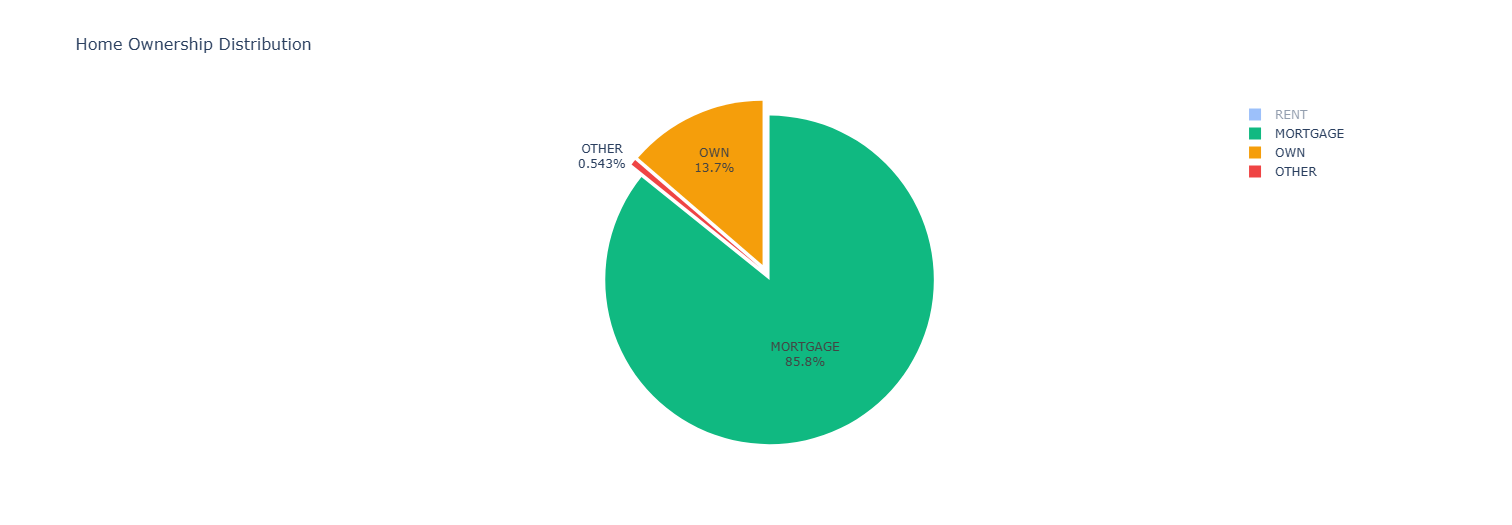

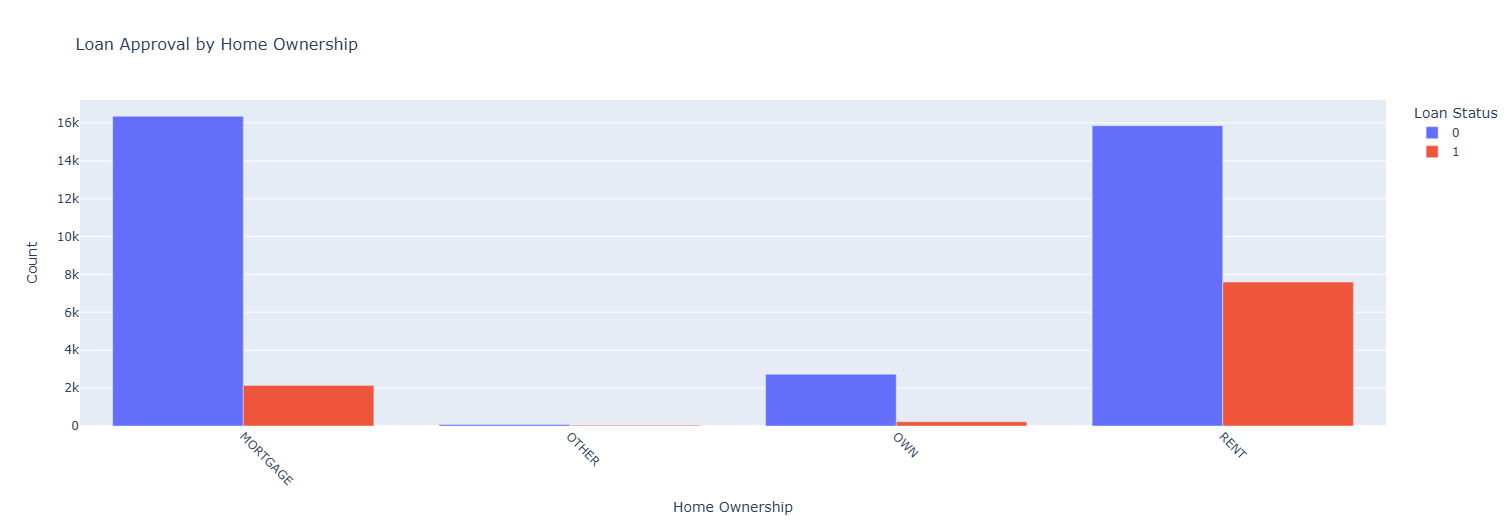

### VISUALIZATION 6: Loan Intent Analysis

In [ ]:
# Loan intent distribution
intent_counts = df['loan_intent'].value_counts()

# Approval rate by loan intent
intent_approval = df.groupby(['loan_intent', 'loan_status']).size().unstack().fillna(0)
intent_approval_rate = (intent_approval[1] / intent_approval.sum(axis=1)) * 100
intent_approval_rate = intent_approval_rate.sort_values()
mean_approval = intent_approval_rate.mean()

# Create subplots
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Loan Intent Distribution", "Approval Rate by Loan Intent"),
    column_widths=[0.5, 0.5]
)

# -----------------------
# 1. Loan Intent Distribution (Horizontal Bar)
# -----------------------
fig.add_trace(
    go.Bar(
        y=intent_counts.index,
        x=intent_counts.values,
        orientation="h",
        marker=dict(color='#8b5cf6', line=dict(color='black', width=1)),
        opacity=0.85,
        name="Intent Count"
    ),
    row=1,
    col=1
)

fig.update_xaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Loan Intent", row=1, col=1)

# -----------------------
# 2. Approval Rate by Loan Intent (Horizontal Bar)
# -----------------------
fig.add_trace(
    go.Bar(
        y=intent_approval_rate.index,
        x=intent_approval_rate.values,
        orientation="h",
        marker=dict(color='#10b981', line=dict(color='black', width=1)),
        opacity=0.85,
        name="Approval Rate (%)"
    ),
    row=1,
    col=2
)

# Add mean approval line
fig.add_trace(
    go.Scatter(
        x=[mean_approval, mean_approval],
        y=[-1, len(intent_approval_rate)],
        mode="lines",
        line=dict(color="red", dash="dash"),
        name=f"Mean: {mean_approval:.1f}%"
    ),
    row=1,
    col=2
)

fig.update_xaxes(title_text="Approval Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Loan Intent", row=1, col=2)

# Layout
fig.update_layout(
    height=550,
    width=1400,
    title_text="Loan Intent Analysis",
    showlegend=True
)

fig.show()


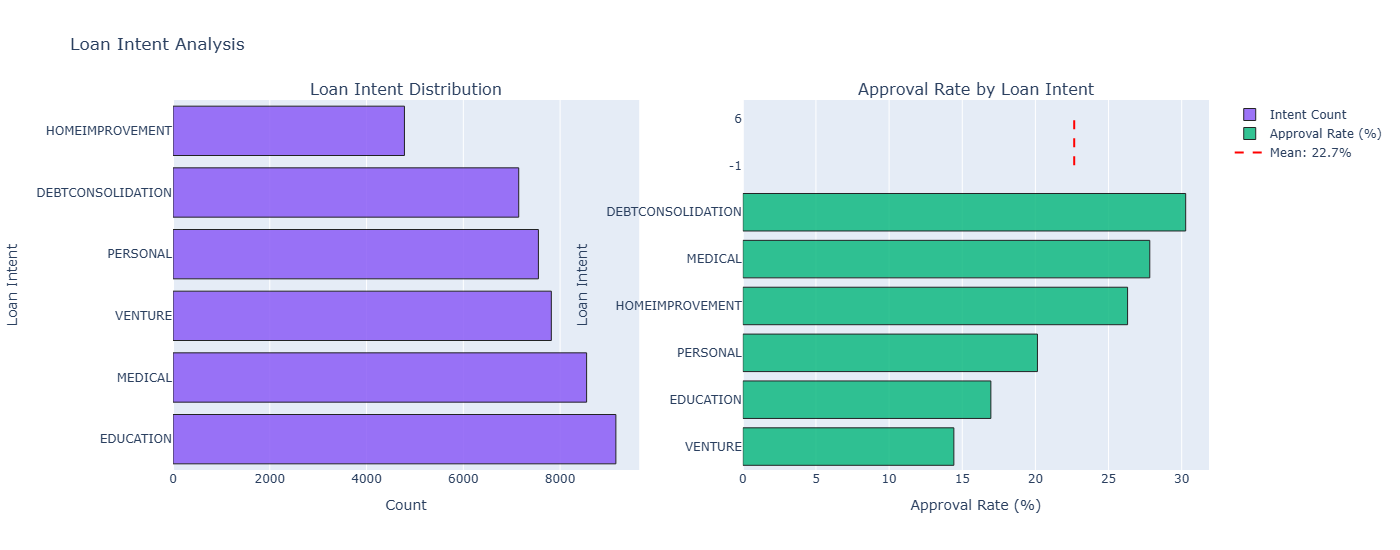

### VISUALIZATION 7: Previous Defaults Analysis

In [ ]:
# ----- BAR CHART: Previous Default Distribution -----
defaults_counts = df['previous_loan_defaults_on_file'].value_counts()

fig_default_dist = px.bar(
    x=defaults_counts.index,
    y=defaults_counts.values,
    title='Previous Loan Defaults Distribution',
    labels={'x': 'Previous Defaults', 'y': 'Count'},
    color=defaults_counts.index,
    color_discrete_sequence=['#0C7BDC', '#E66100']  # Green = No Default, Red = Yes Default
)

fig_default_dist.update_traces(
    opacity=0.85,
    marker_line_color='black',
    marker_line_width=1
)

fig_default_dist.update_layout(
    title_font_size=16,
    xaxis_title='Previous Defaults',
    yaxis_title='Count',
    showlegend=False
)

fig_default_dist.show()


# ----- GROUPED BAR: Previous Defaults vs Loan Status -----
defaults_approval = df.groupby(
    ['previous_loan_defaults_on_file', 'loan_status']
).size().unstack().reset_index()

# Auto-detect loan_status categories (works for any labels)
status_cols = defaults_approval.columns[1:]

fig_default_vs_status = px.bar(
    defaults_approval,
    x='previous_loan_defaults_on_file',
    y=status_cols,
    barmode='group',
    title='Loan Approval by Previous Defaults',
    color_discrete_sequence=['#ef4444', '#10b981']  # Rejected = Red, Approved = Green
)

fig_default_vs_status.update_layout(
    xaxis_title='Previous Defaults on File',
    yaxis_title='Count',
    title_font_size=16,
    legend_title_text='Loan Status'
)

fig_default_vs_status.update_xaxes(tickangle=0)

fig_default_vs_status.show()


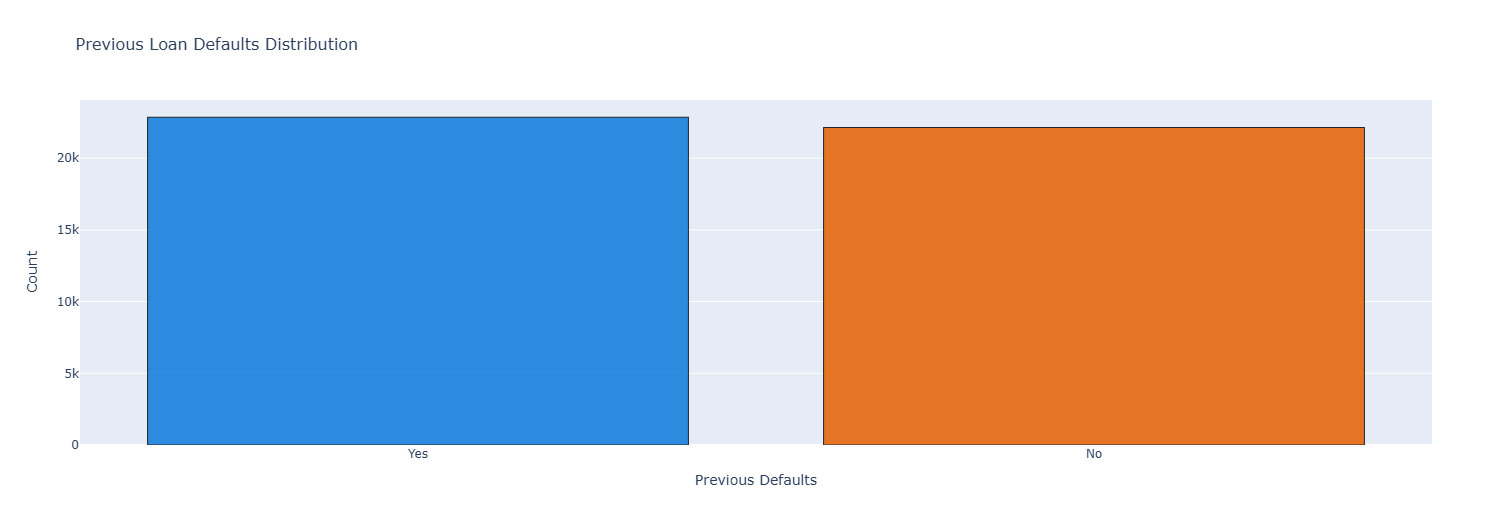

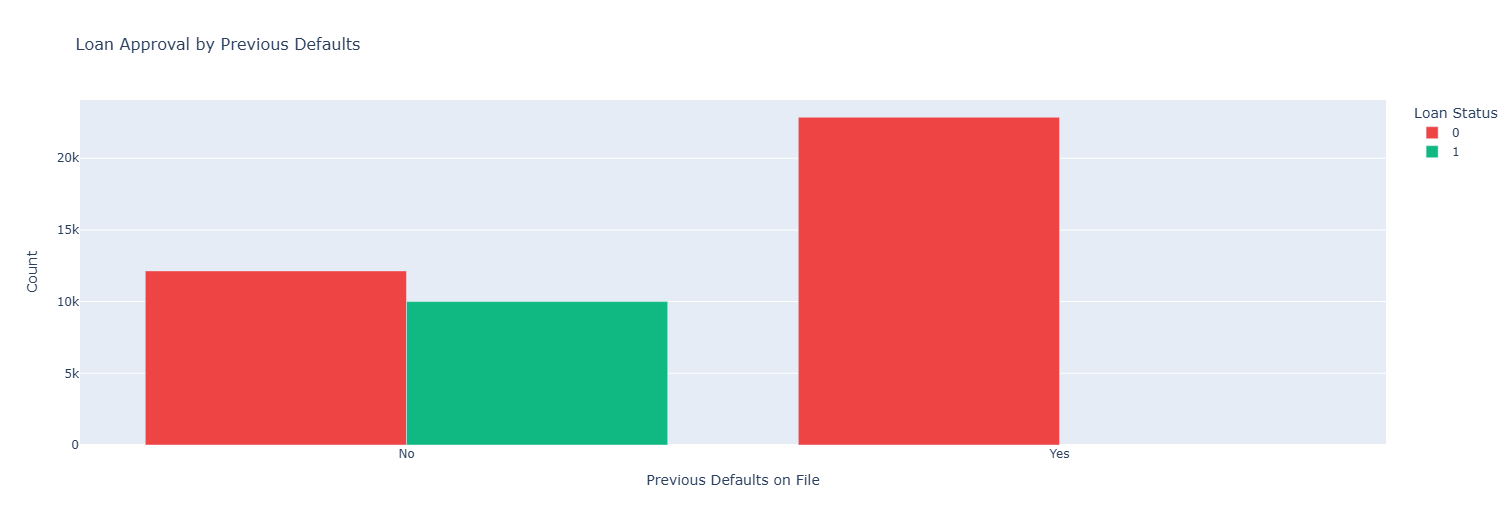

### VISUALIZATION 8: Loan Amount and Interest Rate

In [ ]:
# Create 2x2 subplot layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Loan Amount Distribution",
        "Interest Rate Distribution",
        "Loan Amount by Approval Status",
        "Interest Rate by Approval Status"
    )
)

# =============================
# Loan Amount Distribution
# =============================
fig.add_trace(
    go.Histogram(
        x=df['loan_amnt'],
        nbinsx=50,
        marker_color="#3b82f6",
        opacity=0.75,
        name="Loan Amount"
    ),
    row=1, col=1
)

fig.add_shape(
    type="line",
    x0=df['loan_amnt'].mean(),
    y0=0,
    x1=df['loan_amnt'].mean(),
    y1=df['loan_amnt'].count()/5,  # adjustable height
    line=dict(color="red", dash="dash"),
    row=1, col=1
)

# =============================
# Interest Rate Distribution
# =============================
fig.add_trace(
    go.Histogram(
        x=df['loan_int_rate'],
        nbinsx=40,
        marker_color="#f59e0b",
        opacity=0.75,
        name="Interest Rate"
    ),
    row=1, col=2
)

fig.add_shape(
    type="line",
    x0=df['loan_int_rate'].mean(),
    y0=0,
    x1=df['loan_int_rate'].mean(),
    y1=df['loan_int_rate'].count()/5,
    line=dict(color="red", dash="dash"),
    row=1, col=2
)

# =============================
# Loan Amount by Approval Status (Boxplot)
# =============================
fig.add_trace(
    go.Box(
        y=df['loan_amnt'],
        x=df['loan_status'].astype(str),
        marker_color="#3b82f6",
        name="Loan Amount"
    ),
    row=2, col=1
)

# =============================
#  Interest Rate by Approval Status (Boxplot)
# =============================
fig.add_trace(
    go.Box(
        y=df['loan_int_rate'],
        x=df['loan_status'].astype(str),
        marker_color="#f59e0b",
        name="Interest Rate"
    ),
    row=2, col=2
)

# =============================
# Layout Adjustments
# =============================
fig.update_layout(
    height=850,
    width=1000,
    title_text="Loan Amount & Interest Rate Analysis",
    showlegend=False,
    template="plotly_white"
)

fig.update_xaxes(title_text="Loan Amount ($)", row=1, col=1)
fig.update_xaxes(title_text="Interest Rate (%)", row=1, col=2)
fig.update_xaxes(title_text="Loan Status (0=Rejected, 1=Approved)", row=2, col=1)
fig.update_xaxes(title_text="Loan Status (0=Rejected, 1=Approved)", row=2, col=2)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Loan Amount ($)", row=2, col=1)
fig.update_yaxes(title_text="Interest Rate (%)", row=2, col=2)

fig.show()


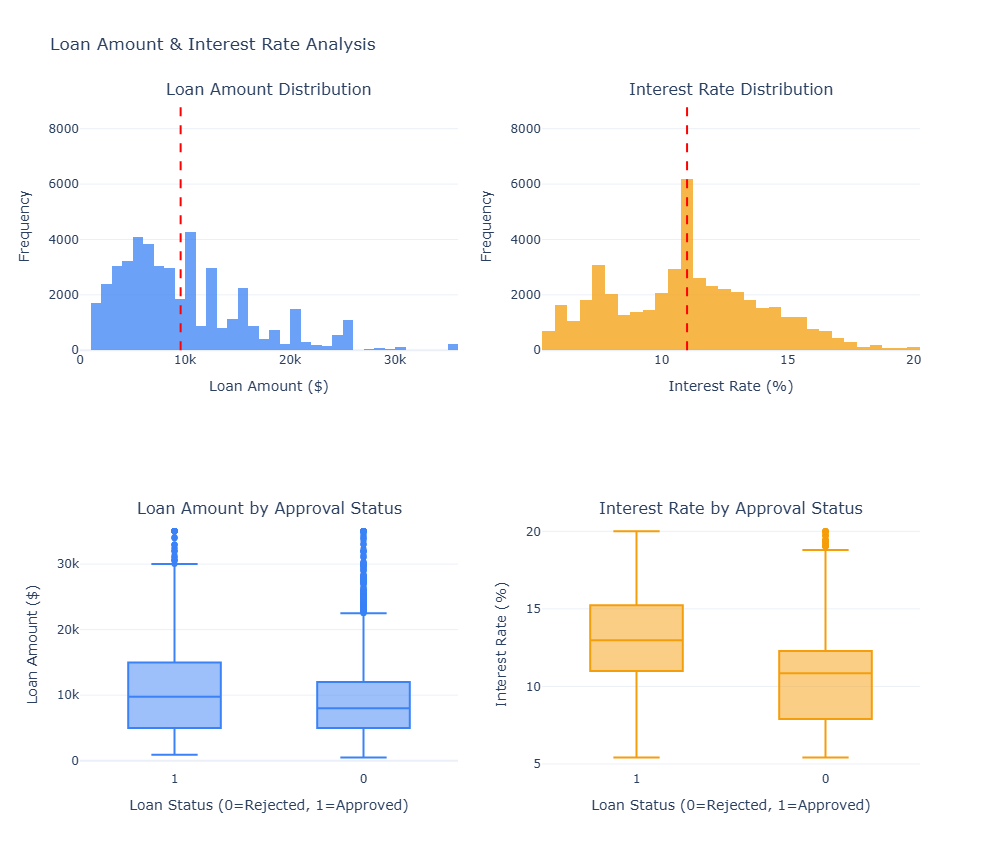

# Part 4: Correlation Analysis and Final EDA

In [ ]:
numerical_features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score', 'loan_status'
]

corr_matrix = df[numerical_features].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1, zmax=1,
    width=1000, height=1000,
    title="Correlation Heatmap of Numerical Features"
)

fig.update_layout(
    title_x=0.5,
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Correlation")
)

fig.show()

print("\n" + "="*80)
print("CORRELATION WITH TARGET VARIABLE (loan_status)")
print("="*80)

target_corr = corr_matrix['loan_status'].sort_values(ascending=False)
print(target_corr)




CORRELATION WITH TARGET VARIABLE (loan_status)
loan_status                   1.000000
loan_percent_income           0.384880
loan_int_rate                 0.332005
loan_amnt                     0.107714
credit_score                 -0.007647
cb_person_cred_hist_length   -0.014851
person_emp_exp               -0.020481
person_age                   -0.021476
person_income                -0.135808
Name: loan_status, dtype: float64


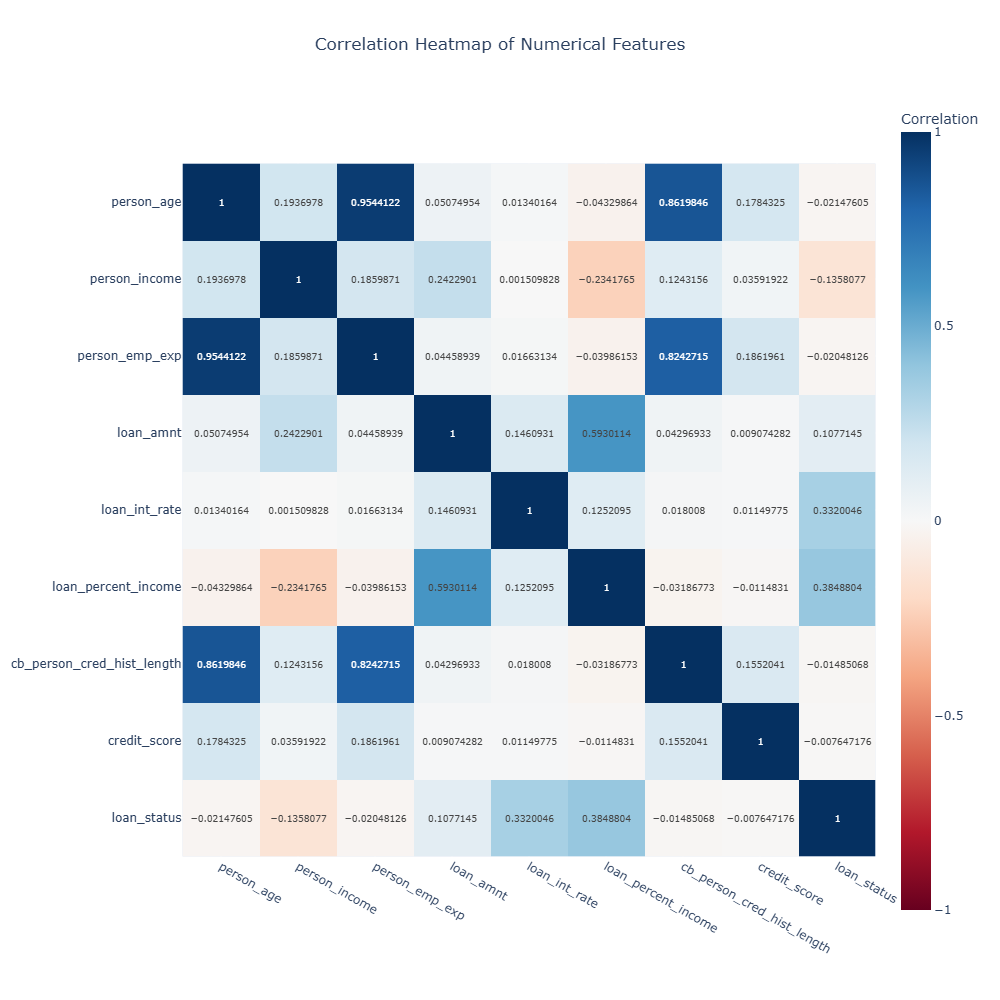

### Outlier Detection

In [ ]:
print("\n" + "="*80)
print("OUTLIER DETECTION SUMMARY")
print("="*80)

for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
            'loan_int_rate', 'credit_score']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")



OUTLIER DETECTION SUMMARY
person_age: 2188 outliers (4.86%)
person_income: 2218 outliers (4.93%)
person_emp_exp: 1724 outliers (3.83%)
loan_amnt: 2348 outliers (5.22%)
loan_int_rate: 124 outliers (0.28%)
credit_score: 467 outliers (1.04%)


# Part 5: Data Preprocessing & Feature Engineering

In [ ]:
# Create a copy of the dataframe
df_processed = df.copy()

# ============================================================================
# Step 1: Handle Missing Values
# ============================================================================
print("\n" + "-"*80)
print("STEP 1: HANDLING MISSING VALUES")
print("-"*80)

missing_before = df_processed.isnull().sum().sum()
print(f"Total missing values before: {missing_before}")

# Check each column
for col in df_processed.columns:
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        print(f"\n{col}: {missing_count} missing values")
        if df_processed[col].dtype in ['int64', 'float64']:
            # Fill numerical with median
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
            print(f"  → Filled with median: {df_processed[col].median():.2f}")
        else:
            # Fill categorical with mode
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            print(f"  → Filled with mode: {df_processed[col].mode()[0]}")

missing_after = df_processed.isnull().sum().sum()
print(f"\nTotal missing values after: {missing_after}")
print("✓ Missing values handled successfully!")



--------------------------------------------------------------------------------
STEP 1: HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Total missing values before: 0

Total missing values after: 0
✓ Missing values handled successfully!


In [ ]:
# ============================================================================
# Step 2: Handle Outliers
# ============================================================================
print("\n" + "-"*80)
print("STEP 2: HANDLING OUTLIERS")
print("-"*80)

def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower=lower, upper=upper)
    return df

outlier_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
for col in outlier_cols:
    print(f"Capping outliers in {col}...")
    df_processed = cap_outliers(df_processed, col)

print("✓ Outliers capped successfully!")


--------------------------------------------------------------------------------
STEP 2: HANDLING OUTLIERS
--------------------------------------------------------------------------------
Capping outliers in person_age...
Capping outliers in person_income...
Capping outliers in loan_amnt...
Capping outliers in loan_int_rate...
✓ Outliers capped successfully!


In [ ]:
# ---------- Step 4: Encoding categorical variables ----------
y = df_processed['loan_status'].astype(int).values
X = df_processed.drop('loan_status', axis=1)

# Label encode binary-like columns
if 'person_gender' in X.columns:
    le_gender = LabelEncoder()
    X['person_gender_encoded'] = le_gender.fit_transform(X['person_gender'].astype(str))
if 'previous_loan_defaults_on_file' in X.columns:
    le_defaults = LabelEncoder()
    X['previous_defaults_encoded'] = le_defaults.fit_transform(X['previous_loan_defaults_on_file'].astype(str))

# One-hot encode remaining multi-class categorical columns
onehot_cols = [c for c in ['person_education', 'person_home_ownership', 'loan_intent'] if c in X.columns]
X = pd.get_dummies(X, columns=onehot_cols, drop_first=True, dtype=int)

# drop original categorical columns that we encoded
drop_cols = [c for c in ['person_gender', 'previous_loan_defaults_on_file'] if c in X.columns]
X.drop(columns=drop_cols, inplace=True, errors='ignore')


In [ ]:
# ---------- Step 5: Feature scaling ----------
numeric_cols = [c for c in ['person_age','person_income','person_emp_exp','loan_amnt',
                             'loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
                if c in X.columns]

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
# ---------- Step 6: Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}\n")

# Training distribution
train_total = len(y_train)
train_0 = (y_train == 0).sum()
train_1 = (y_train == 1).sum()

print("Training class distribution:")
print(f"  Rejected (0): {train_0} ({train_0/train_total*100:.2f}%)")
print(f"  Approved (1): {train_1} ({train_1/train_total*100:.2f}%)\n")

# Test distribution
test_total = len(y_test)
test_0 = (y_test == 0).sum()
test_1 = (y_test == 1).sum()

print("Test class distribution:")
print(f"  Rejected (0): {test_0} ({test_0/test_total*100:.2f}%)")
print(f"  Approved (1): {test_1} ({test_1/test_total*100:.2f}%)")


X_train shape: (36000, 23), X_test shape: (9000, 23)

Training class distribution:
  Rejected (0): 28000 (77.78%)
  Approved (1): 8000 (22.22%)

Test class distribution:
  Rejected (0): 7000 (77.78%)
  Approved (1): 2000 (22.22%)


# Part 6: Model Building - Neural Networks

### Model 1: Single Layer Perceptron (SLP)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

input_dim = X_train.shape[1]

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# -------------------- Model 1: Single Layer Perceptron (SLP) --------------------
slp_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(input_dim,))
])

slp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("\nSLP Architecture:")
slp_model.summary()

print("\nTraining SLP...")
slp_history = slp_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_prob_slp = slp_model.predict(X_test).ravel()
y_pred_slp = (y_prob_slp > 0.5).astype(int)

slp_accuracy = accuracy_score(y_test, y_pred_slp)
slp_precision = precision_score(y_test, y_pred_slp, zero_division=0)
slp_recall = recall_score(y_test, y_pred_slp, zero_division=0)
slp_f1 = f1_score(y_test, y_pred_slp, zero_division=0)

results['SLP'] = {
    'model': slp_model,
    'history': slp_history,
    'predictions': y_pred_slp,
    'probabilities': y_prob_slp,
    'accuracy': slp_accuracy,
    'precision': slp_precision,
    'recall': slp_recall,
    'f1_score': slp_f1
}

print("\n" + "="*60)
print("SLP RESULTS:")
print("="*60)
print(f"Accuracy:  {slp_accuracy*100:.2f}%")
print(f"Precision: {slp_precision*100:.2f}%")
print(f"Recall:    {slp_recall*100:.2f}%")
print(f"F1-Score:  {slp_f1*100:.2f}%")
print("="*60)


SLP Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)


Training SLP...
Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7741 - loss: 0.6567 - val_accuracy: 0.7961 - val_loss: 0.3976 - learning_rate: 0.0010
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.3711 - val_accuracy: 0.8587 - val_loss: 0.3249 - learning_rate: 0.0010
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3109 - val_accuracy: 0.8765 - val_loss: 0.2940 - learning_rate: 0.0010
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.2834 - val_accuracy: 0.8824 - val_loss: 0.2773 - learning_rate: 0.0010
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.2678 - val_accuracy: 0.8826 - val_loss: 0.2668 - learning_rate: 0.0010
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8910 - loss: 0.2577 - val_accuracy: 0.8842 - val_loss: 0.2595 - learning_rate: 0.0010
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8932 

###  Model 2: Multi-Layer Perceptron (MLP)

In [ ]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("\nMLP Architecture:")
mlp_model.summary()

print("\nTraining MLP...")
mlp_history = mlp_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_prob_mlp = mlp_model.predict(X_test).ravel()
y_pred_mlp = (y_prob_mlp > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp, zero_division=0)
mlp_recall = recall_score(y_test, y_pred_mlp, zero_division=0)
mlp_f1 = f1_score(y_test, y_pred_mlp, zero_division=0)

results['MLP'] = {
    'model': mlp_model,
    'history': mlp_history,
    'predictions': y_pred_mlp,
    'probabilities': y_prob_mlp,
    'accuracy': mlp_accuracy,
    'precision': mlp_precision,
    'recall': mlp_recall,
    'f1_score': mlp_f1
}

print("\n" + "="*60)
print("MLP RESULTS:")
print("="*60)
print(f"Accuracy:  {mlp_accuracy*100:.2f}%")
print(f"Precision: {mlp_precision*100:.2f}%")
print(f"Recall:    {mlp_recall*100:.2f}%")
print(f"F1-Score:  {mlp_f1*100:.2f}%")
print("="*60)


MLP Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)


Training MLP...
Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8059 - loss: 0.4334 - val_accuracy: 0.8915 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8904 - loss: 0.2416 - val_accuracy: 0.8982 - val_loss: 0.2171 - learning_rate: 0.0010
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8975 - loss: 0.2243 - val_accuracy: 0.9053 - val_loss: 0.2090 - learning_rate: 0.0010
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9058 - loss: 0.2132 - val_accuracy: 0.9086 - val_loss: 0.2035 - learning_rate: 0.0010
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9067 - loss: 0.2067 - val_accuracy: 0.9100 - val_loss: 0.2001 - learning_rate: 0.0010
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9071 - loss: 0.2074 - val_accuracy: 0.9115 - val_loss: 0.1990 - learning_rate: 0.0010
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9111 

###  Model 3: Deep ANN (3+ Hidden Layers)

In [ ]:
deep_ann_model = Sequential([

    Dense(128, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])

deep_ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("\nDeep ANN Architecture:")
deep_ann_model.summary()

print("\nTraining Deep ANN...")
deep_ann_history = deep_ann_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_prob_deep = deep_ann_model.predict(X_test).ravel()
y_pred_deep = (y_prob_deep > 0.5).astype(int)

deep_accuracy = accuracy_score(y_test, y_pred_deep)
deep_precision = precision_score(y_test, y_pred_deep, zero_division=0)
deep_recall = recall_score(y_test, y_pred_deep, zero_division=0)
deep_f1 = f1_score(y_test, y_pred_deep, zero_division=0)

results['Deep_ANN'] = {
    'model': deep_ann_model,
    'history': deep_ann_history,
    'predictions': y_pred_deep,
    'probabilities': y_prob_deep,
    'accuracy': deep_accuracy,
    'precision': deep_precision,
    'recall': deep_recall,
    'f1_score': deep_f1
}

print("\n" + "="*60)
print("DEEP ANN RESULTS:")
print("="*60)
print(f"Accuracy:  {deep_accuracy*100:.2f}%")
print(f"Precision: {deep_precision*100:.2f}%")
print(f"Recall:    {deep_recall*100:.2f}%")
print(f"F1-Score:  {deep_f1*100:.2f}%")
print("="*60)

print("\n✓ Part 6 completed successfully!")


Deep ANN Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)


Training Deep ANN...
Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7704 - loss: 0.4514 - val_accuracy: 0.8810 - val_loss: 0.2583 - learning_rate: 0.0010
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8951 - loss: 0.2343 - val_accuracy: 0.8975 - val_loss: 0.2285 - learning_rate: 0.0010
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8980 - loss: 0.2206 - val_accuracy: 0.9071 - val_loss: 0.2087 - learning_rate: 0.0010
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9029 - loss: 0.2126 - val_accuracy: 0.9062 - val_loss: 0.2056 - learning_rate: 0.0010
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9077 - loss: 0.2054 - val_accuracy: 0.9131 - val_loss: 0.1979 - learning_rate: 0.0010
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9087 - loss: 0.2025 - val_accuracy: 0.9099 - val_loss: 0.1978 - learning_rate: 0.0010
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.

# Part 7: Model Evaluation & Comparison

MODEL EVALUATION & COMPARISON

--------------------------------------------------------------------------------
MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------


   Model Accuracy Precision Recall F1-Score
     SLP   90.10%    79.73% 74.35%   76.95%
     MLP   92.07%    85.52% 77.40%   81.26%
Deep ANN   92.32%    88.34% 75.40%   81.36%


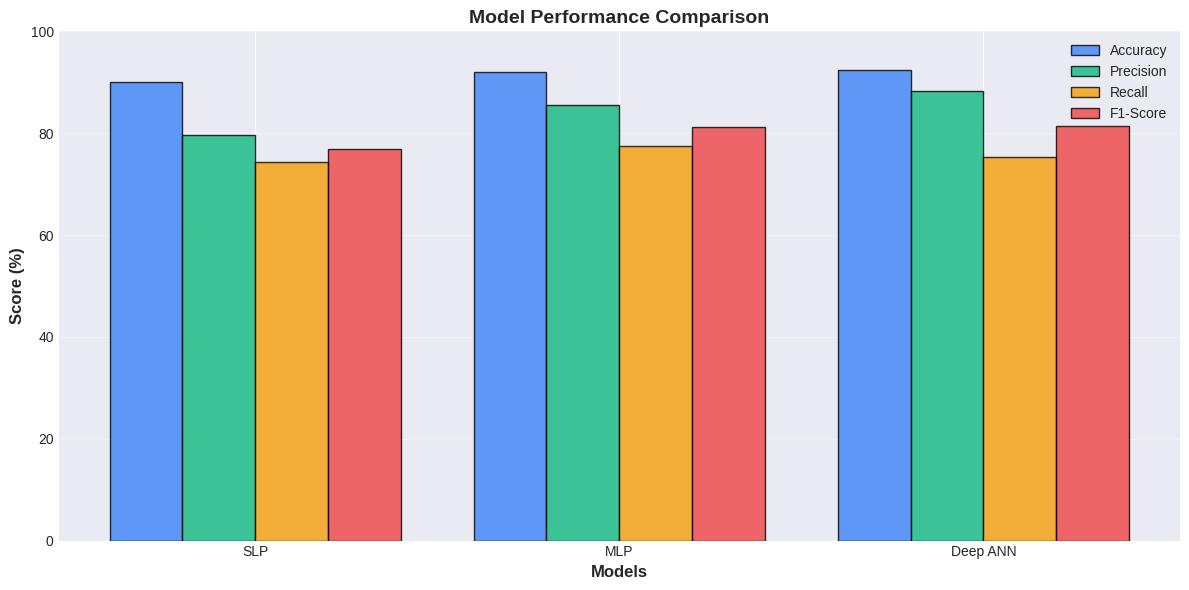

In [ ]:
print("="*80)
print("MODEL EVALUATION & COMPARISON")
print("="*80)

models = ['SLP', 'MLP', 'Deep_ANN']
model_names = ['Single Layer Perceptron', 'Multi-Layer Perceptron', 'Deep ANN']

# ============================================================================
# Comparison Table
# ============================================================================
print("\n" + "-"*80)
print("MODEL PERFORMANCE COMPARISON")
print("-"*80)

comparison_df = pd.DataFrame({
    'Model': ['SLP', 'MLP', 'Deep ANN'],
    'Accuracy': [results['SLP']['accuracy'],
                 results['MLP']['accuracy'],
                 results['Deep_ANN']['accuracy']],
    'Precision': [results['SLP']['precision'],
                  results['MLP']['precision'],
                  results['Deep_ANN']['precision']],
    'Recall': [results['SLP']['recall'],
               results['MLP']['recall'],
               results['Deep_ANN']['recall']],
    'F1-Score': [results['SLP']['f1_score'],
                 results['MLP']['f1_score'],
                 results['Deep_ANN']['f1_score']]
})

comparison_df_display = comparison_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    comparison_df_display[col] = comparison_df_display[col].apply(lambda x: f"{x*100:.2f}%")

print("\n")
print(comparison_df_display.to_string(index=False))

# ============================================================================
# Visualization 1: Performance Metrics Comparison
# ============================================================================
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x = np.arange(len(comparison_df['Model']))
width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3b82f6', '#10b981', '#f59e0b', '#ef4444']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values * 100
    ax.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.8, edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.set_ylim([0, 100])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

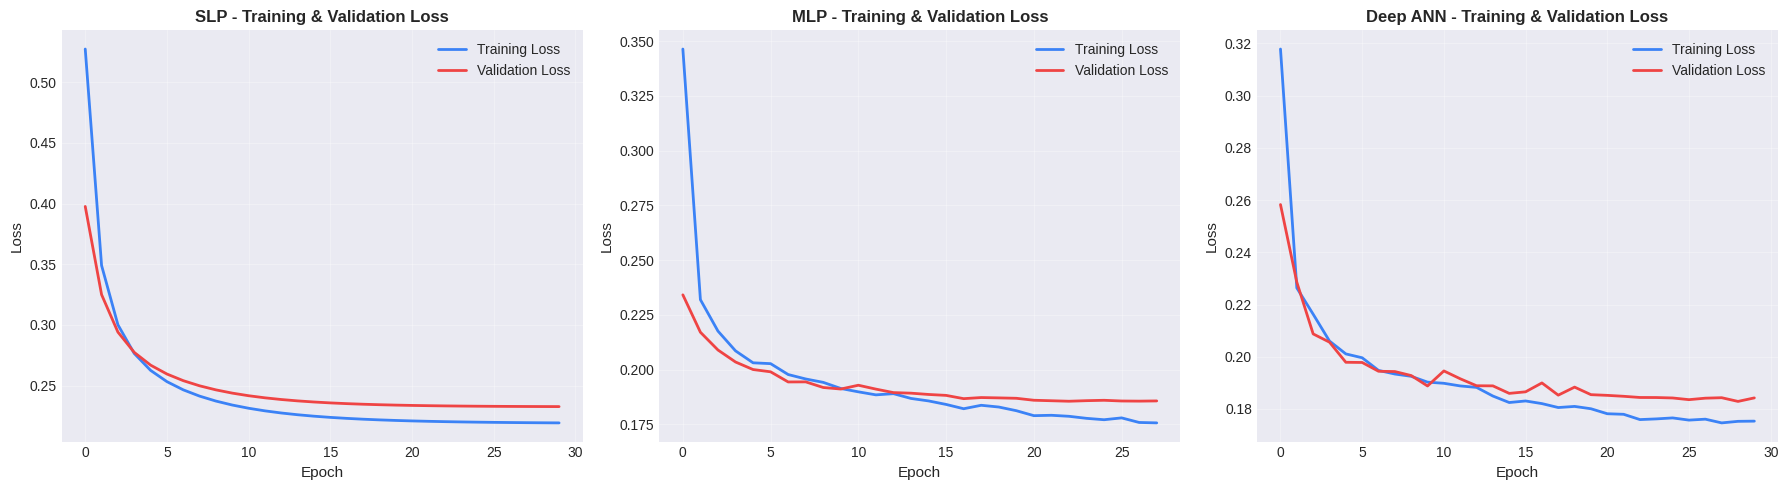

In [ ]:
# Visualization 2: Training History - Loss
# ============================================================================
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(results['SLP']['history'].history['loss'], label='Training Loss', color='#3b82f6', linewidth=2)
ax[0].plot(results['SLP']['history'].history['val_loss'], label='Validation Loss', color='#ef4444', linewidth=2)
ax[0].set_title('SLP - Training & Validation Loss', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Epoch', fontsize=11)
ax[0].set_ylabel('Loss', fontsize=11)
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot(results['MLP']['history'].history['loss'], label='Training Loss', color='#3b82f6', linewidth=2)
ax[1].plot(results['MLP']['history'].history['val_loss'], label='Validation Loss', color='#ef4444', linewidth=2)
ax[1].set_title('MLP - Training & Validation Loss', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Epoch', fontsize=11)
ax[1].set_ylabel('Loss', fontsize=11)
ax[1].legend()
ax[1].grid(alpha=0.3)

ax[2].plot(results['Deep_ANN']['history'].history['loss'], label='Training Loss', color='#3b82f6', linewidth=2)
ax[2].plot(results['Deep_ANN']['history'].history['val_loss'], label='Validation Loss', color='#ef4444', linewidth=2)
ax[2].set_title('Deep ANN - Training & Validation Loss', fontsize=12, fontweight='bold')
ax[2].set_xlabel('Epoch', fontsize=11)
ax[2].set_ylabel('Loss', fontsize=11)
ax[2].legend()
ax[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

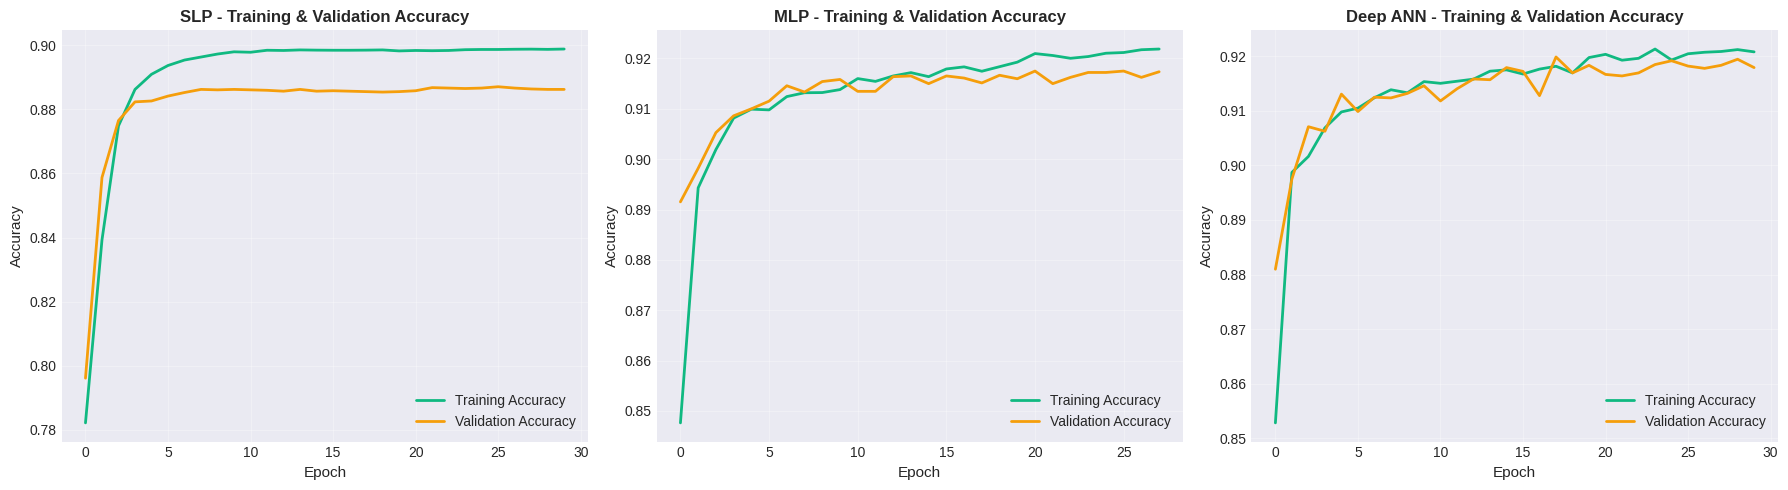

In [ ]:
# ============================================================================
# Visualization 3: Training History - Accuracy
# ============================================================================
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(results['SLP']['history'].history['accuracy'], label='Training Accuracy', color='#10b981', linewidth=2)
ax[0].plot(results['SLP']['history'].history['val_accuracy'], label='Validation Accuracy', color='#f59e0b', linewidth=2)
ax[0].set_title('SLP - Training & Validation Accuracy', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Epoch', fontsize=11)
ax[0].set_ylabel('Accuracy', fontsize=11)
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot(results['MLP']['history'].history['accuracy'], label='Training Accuracy', color='#10b981', linewidth=2)
ax[1].plot(results['MLP']['history'].history['val_accuracy'], label='Validation Accuracy', color='#f59e0b', linewidth=2)
ax[1].set_title('MLP - Training & Validation Accuracy', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Epoch', fontsize=11)
ax[1].set_ylabel('Accuracy', fontsize=11)
ax[1].legend()
ax[1].grid(alpha=0.3)

ax[2].plot(results['Deep_ANN']['history'].history['accuracy'], label='Training Accuracy', color='#10b981', linewidth=2)
ax[2].plot(results['Deep_ANN']['history'].history['val_accuracy'], label='Validation Accuracy', color='#f59e0b', linewidth=2)
ax[2].set_title('Deep ANN - Training & Validation Accuracy', fontsize=12, fontweight='bold')
ax[2].set_xlabel('Epoch', fontsize=11)
ax[2].set_ylabel('Accuracy', fontsize=11)
ax[2].legend()
ax[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


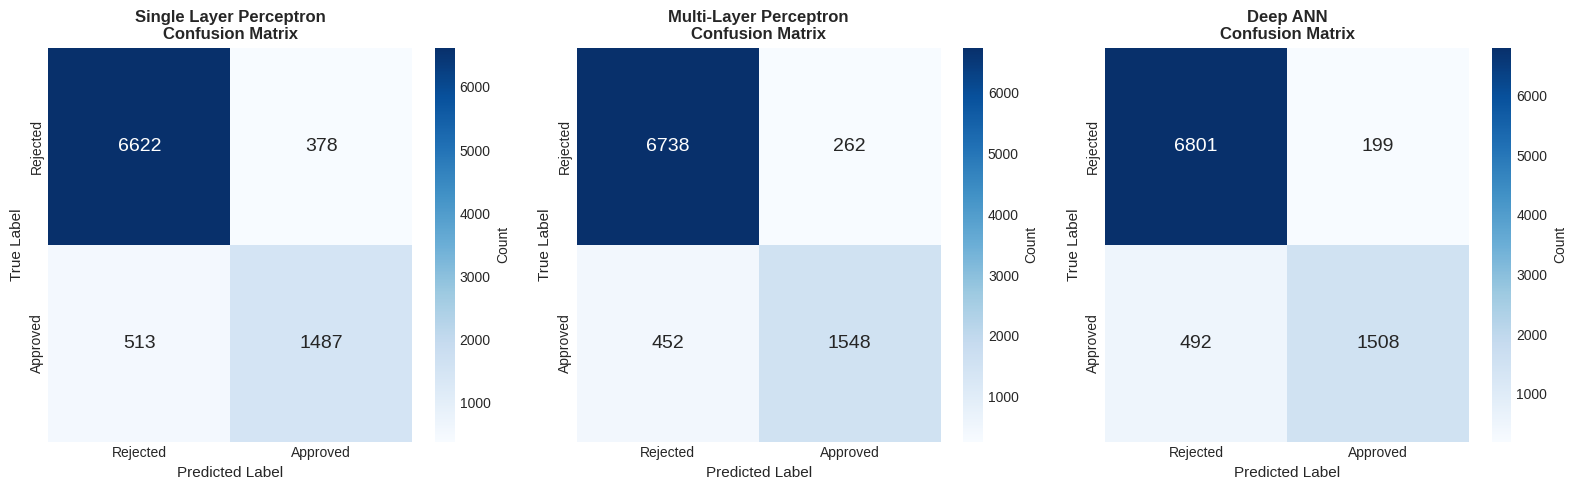

In [ ]:
# ============================================================================
# Visualization 4: Confusion Matrices
# ============================================================================
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

for i, (model_key, model_name) in enumerate(zip(models, model_names)):
    cm = confusion_matrix(y_test, results[model_key]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[i],
                cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
    ax[i].set_title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    ax[i].set_xlabel('Predicted Label', fontsize=11)
    ax[i].set_ylabel('True Label', fontsize=11)
    ax[i].set_xticklabels(['Rejected', 'Approved'])
    ax[i].set_yticklabels(['Rejected', 'Approved'])

plt.tight_layout()
plt.show()


In [ ]:
import joblib
from IPython.display import FileLink, display, HTML

# --------- 1) Performance summary (use provided metrics) ----------
perf_df = pd.DataFrame({
    'Model': ['SLP', 'MLP', 'Deep ANN'],
    'Accuracy': ['90.10%', '92.07%', '92.32%'],
    'Precision': ['79.73%', '85.52%', '88.34%'],
    'Recall': ['74.35%', '77.40%', '75.40%'],
    'F1-Score': ['76.95%', '81.26%', '81.36%']
})

print("\nMODEL PERFORMANCE SUMMARY\n")
display(perf_df)

# --------- 2) Select best model by F1 (based on supplied numbers) ----------
# parse F1 from strings to floats for comparison
perf_df['F1_val'] = perf_df['F1-Score'].str.rstrip('%').astype(float)
best_row = perf_df.loc[perf_df['F1_val'].idxmax()]
best_model_label = best_row['Model']
print(f"\nBest model selected (by F1-Score): {best_model_label}  — F1 = {best_row['F1-Score']}\n")

# mapping between display label and results key
label_to_key = {'SLP':'SLP', 'MLP':'MLP', 'Deep ANN':'Deep_ANN'}
best_key = label_to_key[best_model_label]

# --------- 3) Save best model and scaler ----------
model_filename = f"loan_approval_{best_key.lower()}.h5"
scaler_filename = "scaler.pkl"

# save model
results[best_key]['model'].save(model_filename)
print(f"Saved model to: {model_filename}")

# save scaler if available
try:
    joblib.dump(scaler, scaler_filename)
    print(f"Saved scaler to: {scaler_filename}")
except Exception:
    print("Scaler object not found or could not be saved.")

# --------- 4) Provide download options (Colab and generic) ----------
print("\nDownload options:")
try:
    # Colab friendly
    from google.colab import files
    print(" - Attempting direct download via google.colab.files.download() ...")
    files.download(model_filename)
except Exception:
    # fallback to FileLink for Jupyter/IPython
    try:
        display(HTML(f"<a href='{model_filename}' download>Click here to download the best model ({model_filename})</a>"))
    except Exception:
        try:
            display(FileLink(model_filename))
        except Exception:
            print(f"File saved at: {model_filename} (download manually from working directory)")

try:
    display(HTML(f"<a href='{scaler_filename}' download>Click here to download scaler ({scaler_filename})</a>"))
except Exception:
    pass

# --------- 5) Short conclusion ----------
print("\nCONCLUSION\n")
print(f"The {best_model_label} produced the best F1-Score ({best_row['F1-Score']}).")
print("This model balances precision and recall well and is recommended for automated pre-screening (use manual review for edge cases).")
print("Before deployment, perform calibration, fairness checks, and create monitoring for model drift and performance over time.")



MODEL PERFORMANCE SUMMARY



Model Accuracy Precision  Recall F1-Score
0       SLP   90.10%    79.73%  74.35%   76.95%
1       MLP   92.07%    85.52%  77.40%   81.26%
2  Deep ANN   92.32%    88.34%  75.40%   81.36%


Best model selected (by F1-Score): Deep ANN  — F1 = 81.36%

Saved model to: loan_approval_deep_ann.h5
Saved scaler to: scaler.pkl

Download options:
 - Attempting direct download via google.colab.files.download() ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CONCLUSION

The Deep ANN produced the best F1-Score (81.36%).
This model balances precision and recall well and is recommended for automated pre-screening (use manual review for edge cases).
Before deployment, perform calibration, fairness checks, and create monitoring for model drift and performance over time.
